Importing modules

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('X data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [109]:
df.shape

(162980, 2)

In [110]:
df.category.value_counts()

,count
category,
1.0,72250
0.0,55213
-1.0,35510


In [111]:
df.isna().value_counts()

clean_text  category
False       False       162969
            True             7
True        False            4
Name: count, dtype: int64

In [112]:
df.dropna(subset=['clean_text', 'category'], inplace=True)

In [113]:
df.shape

(162969, 2)

In [114]:
import re
# regularExpression

def cleaning(text):
    # Remove URLs, mentions, hashtags, and non-alphanumeric characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@user)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

df['clean_text'] = df['clean_text'].apply(cleaning)


In [115]:
from nltk.tokenize import word_tokenize

In [116]:
import nltk
nltk.download('punkt_tab')

df['tokens'] = df['clean_text'].apply(word_tokenize)
# a nested list of words per tweet

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [117]:
from nltk.corpus import stopwords

In [118]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
df['tokens']

,tokens
0,"[when, modi, promised, minimum, government, ma..."
1,"[talk, all, the, nonsense, and, continue, all,..."
2,"[what, did, just, say, vote, for, modi, welcom..."
3,"[asking, his, supporters, prefix, chowkidar, t..."
4,"[answer, who, among, these, the, most, powerfu..."
...,...
162975,"[why, these, crores, paid, neerav, modi, not, ..."
162976,"[dear, rss, terrorist, payal, gawar, what, abo..."
162977,"[did, you, cover, her, interaction, forum, whe..."
162978,"[there, big, project, came, into, india, modi,..."


In [120]:
def remove_stopwords(tokens):
    nsw_tokens = [word for word in tokens if word not in stop_words]

    return " ".join(nsw_tokens)

df['clean_text'] = df['tokens'].apply(remove_stopwords)

In [121]:
df['clean_text']

,clean_text
0,modi promised minimum government maximum gover...
1,talk nonsense continue drama vote modi
2,say vote modi welcome bjp told rahul main camp...
3,asking supporters prefix chowkidar names modi ...
4,answer among powerful world leader today trump...
...,...
162975,crores paid neerav modi recovered congress lea...
162976,dear rss terrorist payal gawar modi killing pl...
162977,cover interaction forum left
162978,big project came india modi dream project happ...


In [122]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text'])

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, multi_class='ovr')

# Train the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Accuracy
print("Accuracy: ",f'{accuracy_score(y_test, y_pred)*100:.2f}',"%")

# Detailed classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy:  88.53 %
              precision    recall  f1-score   support

        -1.0       0.88      0.75      0.81      7152
         0.0       0.85      0.97      0.91     11067
         1.0       0.92      0.88      0.90     14375

    accuracy                           0.89     32594
   macro avg       0.88      0.87      0.87     32594
weighted avg       0.89      0.89      0.88     32594



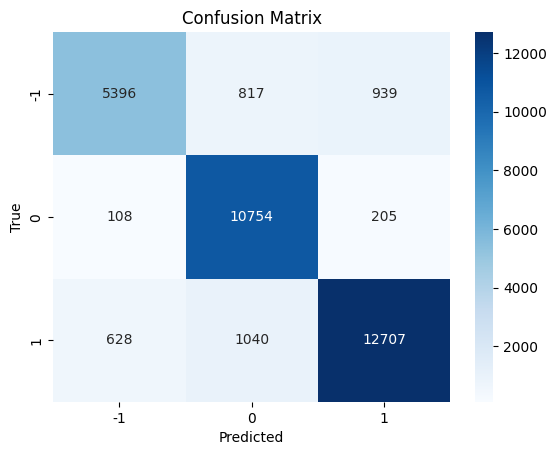

In [124]:
# Optional: Confusion Matrix (to see performance across classes)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [125]:
# practical prediction of this model
sample_tweet = "let state govt handle law and order why drag modi resolve street fights"

# cleaning sample
clean_sample = cleaning(sample_tweet)
sample_tokens = word_tokenize(clean_sample)
sample_nsw = [remove_stopwords(sample_tokens)]
print(sample_nsw)
sample_vector = tfidf_vectorizer.transform(sample_nsw)
model.predict(sample_vector)

['let state govt handle law order drag modi resolve street fights']


array([-1.])